In [1]:
import numpy as np
import pandas as pd
import torch
import random


random.seed(0)
#Generate 5 random numbers between 10 and 30
n_samples=1000
n_features = 5
df_XY=pd.DataFrame(data = np.random.normal(0,1, size=(n_samples, n_features)), columns = ['A','B','C','D','E'])
df_XY['Y']=list(np.random.randint(2, size=n_samples))
df_XY['YY']=list(np.random.randint(2, size=n_samples))
df_XY

##############################################################   
df_XY.shape
df_XY.head()
df_XY.to_csv('df_XY.csv',index=False)
##############################################################

In [2]:
df_XY

,A,B,C,D,E,Y,YY
0,0.469627,0.555807,-0.542321,-0.654887,0.097087,1,1
1,-0.317796,-1.122407,1.917621,-0.943724,-0.579346,0,1
2,-1.092385,0.553714,-2.342428,-0.824900,-0.603266,1,1
3,0.929773,1.481338,1.489120,-0.194337,1.832073,1,0
4,0.721942,0.788117,0.687207,-0.545574,0.738955,1,1
...,...,...,...,...,...,...,...
995,2.261081,0.445994,1.543056,-0.461881,-0.399008,1,0
996,-0.660032,-1.442720,0.619773,0.108675,-1.473300,0,1
997,-0.167668,0.379538,1.096135,-0.548699,-0.501281,1,0
998,0.801089,-0.309829,-1.269537,0.381387,0.309010,1,0


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
! rm -r ci_vae

rm: cannot remove 'ci_vae': No such file or directory


In [5]:
! rm bb.pt
! rm bb_residuals.pkl
! rm df_reconstructed.csv
! rm df_reconstructed_decoder.csv
! rm residuals.pdf
! rm results_dict.pkl
! rm df_latent.csv

rm: cannot remove 'bb.pt': No such file or directory
rm: cannot remove 'bb_residuals.pkl': No such file or directory


In [6]:
! git clone https://github.com/monabiyan/ci_vae.git

Cloning into 'ci_vae'...
remote: Enumerating objects: 299, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 299 (delta 34), reused 38 (delta 18), pack-reused 245
Receiving objects: 100% (299/299), 46.30 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (190/190), done.
Checking out files: 100% (11/11), done.


In [7]:
from ci_vae import ivae

In [8]:
seed = 0
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [9]:
model_init=True
model_tobe_trained=True

import sklearn
model_init=True
model_tobe_trained=True

save_address="bb"


In [10]:
kl_coef = 0.0001
reconst_coef = 1
classifier_coef = 0.2

#kl_coef = 0
#reconst_coef = 1
#classifier_coef = 0

obj1 = ivae.IVAE(df_XY = df_XY,
               reconst_coef = reconst_coef,
               latent_size = 10,
               kl_coef = kl_coef,
               classifier_coef = classifier_coef,
               test_ratio = 1)

obj=obj1

In [11]:
if model_init:
    obj.model_initialiaze()

In [12]:
print(obj1.model)

IVAE_ARCH(
  (encoder): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (7): Dropout(p=0.05, inplace=False)
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (11): Dropout(p=0.05, inplace=False)
    (12): Linear(in_features=20, out_features=20, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (15): Dropout(p=0.05, inplace=False)
    (16): Linear(in_features=20, out_features=20, bias=True)
    (17): ReLU()
    (18): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=Tru

In [13]:
for param in obj1.model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0220,  0.4361, -0.2968, -0.3843, -0.0973],
        [ 0.4348, -0.3824,  0.1845,  0.1145, -0.1894],
        [-0.3668,  0.1873,  0.1677, -0.0117,  0.1767],
        [ 0.2446, -0.3150, -0.3866, -0.0744, -0.0644],
        [-0.1718,  0.1177, -0.3432,  0.4346, -0.0900],
        [-0.2498, -0.0715, -0.3541, -0.3870,  0.1294],
        [-0.1227, -0.2422,  0.2062,  0.3493,  0.0501],
        [-0.2229,  0.2434, -0.1540, -0.2070, -0.0872],
        [-0.1087,  0.4317, -0.0803, -0.4027, -0.1420],
        [ 0.1641,  0.1934, -0.3000, -0.3150, -0.1272],
        [ 0.0286, -0.3680,  0.2059, -0.0839,  0.2602],
        [ 0.1333, -0.0714, -0.0404,  0.1375, -0.2324],
        [-0.1159,  0.2047, -0.3992, -0.0890,  0.0931],
        [-0.2306,  0.2117,  0.2215, -0.0648, -0.1437],
        [ 0.2164,  0.0252, -0.3458,  0.2577,  0.4403],
        [ 0.3828, -0.2467,  0.4152, -0.1864, -0.3389],
        [ 0.3203, -0.3154,  0.4111,  0.4383, -0.3006],
        [ 0.2962, -0.0853, -0.1163,  0.0678

In [ ]:
##########
if model_tobe_trained:
    lr=1e-2
    print(lr)
    obj.model_training(epochs=3000,learning_rate=lr)

    lr=1e-3
    print(lr)
    #obj.model_training(epochs=70,learning_rate=lr)

    lr=1e-3
    print(lr)
    #obj.model_training(epochs=200,learning_rate=lr)

    obj.model_save(address=save_address+".pt")
    obj.save_residuals(address=save_address+'_residuals.pkl')
    lr=1e-3
    print(lr)
    obj.model_training(epochs=3000,learning_rate=lr)

    lr=5e-4
    print(lr)
    obj.model_training(epochs=3000,learning_rate=lr)

    obj.model_save(address=save_address+".pt")
    obj.save_residuals(address=save_address+'_residuals.pkl')

    lr=1e-5
    print(lr)
    obj.model_training(epochs=3000,learning_rate=lr)

    lr=5e-6
    print(lr)
    obj.model_training(epochs=3000,learning_rate=lr)


In [15]:
##########
print("running the neural network")
#run(obj1,save_address)
obj1.model_save(address=save_address+".pt")
obj1.save_residuals(address=save_address+'_residuals.pkl')

running the neural network


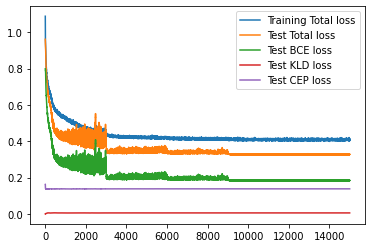

<Figure size 432x288 with 0 Axes>

In [16]:
obj1.plot_residuals(init_index=0)

In [17]:
print("start of the code")
import pandas as pd
import numpy as np
import sklearn
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##############################################################   
##############################################################
model_init=True
model_tobe_trained=False

model_init=True
model_file_address='./bb.pt'
save_address1="./"

df_XY=pd.read_csv('df_XY.csv')

start of the code


In [18]:
obj1 = ivae.IVAE(df_XY = df_XY,
               reconst_coef = reconst_coef,
               latent_size = 10,
               kl_coef = kl_coef,
               classifier_coef = classifier_coef,
               test_ratio = 1)

obj1.model_initialiaze()

obj1.model_load(address="bb.pt")

In [19]:
for param in obj1.model.parameters():
    print(param)

Parameter containing:
tensor([[ 4.2904e-01,  4.5817e-01, -2.7000e-01, -1.4712e+00, -2.3135e-01],
        [-1.2061e-02, -1.2593e+00, -4.6501e-02, -1.8998e-03,  4.6680e-02],
        [ 8.9590e-03, -1.2180e-02,  3.7444e-01, -1.3914e-02, -1.4770e-02],
        [-5.6618e-02,  1.1032e-02, -9.5152e-01,  3.1446e-02,  5.7717e-02],
        [ 3.3061e-03,  2.2233e-02, -6.5402e-01,  2.1104e-02,  2.7898e-04],
        [-6.4351e-01, -3.1509e-01,  7.0543e-01,  1.3933e+00,  1.1758e-01],
        [ 2.6280e-01, -2.8608e-01,  3.1558e-03,  2.2730e+00,  4.2129e-01],
        [-1.2311e+00,  5.4216e-02, -6.6483e-03,  1.0893e-01, -9.4122e-02],
        [ 1.8099e-02,  5.9867e-01,  1.8256e-02,  1.5038e-02, -2.6626e-02],
        [ 3.5854e-01,  1.5374e-01, -3.6204e-01, -1.3752e+00, -2.4652e-01],
        [-9.0202e-01,  3.4532e-02, -3.9640e-03,  5.7886e-02, -8.1341e-02],
        [ 1.4240e-02, -2.9173e-02, -2.2061e-02,  4.8763e-02, -5.8090e-01],
        [-1.2199e-04,  1.8307e-02, -5.6619e-01,  1.3525e-02,  7.3203e-03],
   

In [20]:
with torch.no_grad():
    obj1.model.eval()


    #obj1.load_residuals(address='bb_residuals.pkl')
    print("model loaded")
    
    
    obj1.generate_test_results()
    print("test data generated")

model loaded
test data generated


In [21]:
print(obj1.x_last)

tensor([[ 0.4696,  0.5558, -0.5423, -0.6549,  0.0971],
        [-0.3178, -1.1224,  1.9176, -0.9437, -0.5793],
        [-1.0924,  0.5537, -2.3424, -0.8249, -0.6033],
        ...,
        [-0.1677,  0.3795,  1.0961, -0.5487, -0.5013],
        [ 0.8011, -0.3098, -1.2695,  0.3814,  0.3090],
        [ 0.6967, -1.9915, -1.1563, -0.3737,  0.2409]])


In [22]:
print(obj1.x_pred)


tensor([[ 0.7242,  0.4723, -0.5948, -1.0119,  0.1207],
        [-0.0041, -1.0187,  1.6919, -0.8377, -0.5693],
        [-0.7126,  0.4143, -1.8962, -0.1228, -0.4805],
        ...,
        [ 0.0903,  0.3032,  1.1391, -0.7301, -0.5516],
        [ 0.7636, -0.3126, -1.3676,  0.1443,  0.3479],
        [ 0.9460, -1.4076, -1.0009, -0.3270,  0.3217]])


In [23]:
(np.abs(obj1.x_pred - obj1.x_last)).mean()

tensor(0.1843)

In [24]:
(obj1.x_pred-obj1.x_last)

tensor([[ 0.2546, -0.0835, -0.0525, -0.3570,  0.0236],
        [ 0.3137,  0.1037, -0.2257,  0.1060,  0.0100],
        [ 0.3798, -0.1394,  0.4462,  0.7021,  0.1228],
        ...,
        [ 0.2580, -0.0764,  0.0429, -0.1814, -0.0503],
        [-0.0375, -0.0027, -0.0980, -0.2371,  0.0388],
        [ 0.2493,  0.5839,  0.1554,  0.0467,  0.0808]])

In [25]:
print(obj1.y_last)

tensor([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [26]:
print(obj1.y_pred)

tensor([[ 0.0120, -0.0107],
        [ 0.0087, -0.0092],
        [ 0.0335, -0.0311],
        ...,
        [ 0.0119, -0.0128],
        [ 0.0144, -0.0152],
        [ 0.0287, -0.0306]])


In [27]:
df_XY

,A,B,C,D,E,Y,YY
0,0.469627,0.555807,-0.542321,-0.654887,0.097087,1,1
1,-0.317796,-1.122407,1.917621,-0.943724,-0.579346,0,1
2,-1.092385,0.553714,-2.342428,-0.824900,-0.603266,1,1
3,0.929773,1.481338,1.489120,-0.194337,1.832073,1,0
4,0.721942,0.788117,0.687207,-0.545574,0.738955,1,1
...,...,...,...,...,...,...,...
995,2.261081,0.445994,1.543056,-0.461881,-0.399008,1,0
996,-0.660032,-1.442720,0.619773,0.108675,-1.473300,0,1
997,-0.167668,0.379538,1.096135,-0.548699,-0.501281,1,0
998,0.801089,-0.309829,-1.269537,0.381387,0.309010,1,0


In [28]:
with torch.no_grad():
    obj1.model.eval()
    for x, y in obj1.testloader:
      x = x.to(device)
      print(x.size())
      print(x)
      # forward
      x_hat,y_hat, mu, logvar,z = obj1.model(x)
    
    df_reconstructed = pd.DataFrame(x_hat.cpu().detach().numpy(), columns=obj1.df_XY.drop(columns=['Y']).columns)
    print(df_reconstructed.shape)
    df_latent=pd.DataFrame(z.cpu().detach().numpy())
    
    obj1.model.eval()
    
    df_reconstructed_decoder=pd.DataFrame(obj1.model.decoder(z).cpu().detach().numpy(), columns=obj1.df_XY.drop(columns=['Y']).columns)

    df_reconstructed.to_csv('df_reconstructed.csv')
    df_latent.to_csv('df_latent.csv')
    df_reconstructed_decoder.to_csv('df_reconstructed_decoder.csv')
    print("Full_data_reconstructed...")
    
    print("========df_reconstructed========")
    print(df_reconstructed)
    print("========df_reconstructed_decoder========")
    print(df_reconstructed_decoder)
    print("========df_Original========")
    print(df_XY)
    
    
    


torch.Size([1000, 5])
tensor([[ 0.4696,  0.5558, -0.5423, -0.6549,  0.0971],
        [-0.3178, -1.1224,  1.9176, -0.9437, -0.5793],
        [-1.0924,  0.5537, -2.3424, -0.8249, -0.6033],
        ...,
        [-0.1677,  0.3795,  1.0961, -0.5487, -0.5013],
        [ 0.8011, -0.3098, -1.2695,  0.3814,  0.3090],
        [ 0.6967, -1.9915, -1.1563, -0.3737,  0.2409]])
(1000, 5)
Full_data_reconstructed...
========df_reconstructed========
            A         B         C         D         E
0    0.729645  0.445518 -0.601037 -1.013442  0.109312
1   -0.005805 -1.015505  1.692325 -0.836348 -0.562878
2   -0.714155  0.427343 -1.894867 -0.122299 -0.472054
3    0.791698  1.107208  1.417503 -0.265844  1.386735
4    0.936957  0.662223  0.684182 -0.698537  0.695530
..        ...       ...       ...       ...       ...
995  1.115392  0.437392  1.381155 -0.473024 -0.480404
996 -0.590988 -1.272316  0.577467 -0.505950 -1.293044
997  0.094544  0.302407  1.134132 -0.733615 -0.553890
998  0.757734 -0.302843 

In [29]:
print("regression analysis")
obj1.regression_analysis(obj1.zs,df_XY['Y'])

regression analysis
0.549


In [30]:
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


calculate tsne_umap_pca


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


tensor([[-0.1239,  0.4540,  0.7237,  ..., -0.6670,  0.4234, -0.2251],
        [-0.0828, -0.3458,  0.6892,  ..., -0.1292, -0.0577, -0.9199],
        [-0.0657, -0.1237,  0.2550,  ..., -0.0504,  0.1609, -0.2799],
        ...,
        [-0.1160,  0.0767,  0.7352,  ...,  0.7016, -0.9698, -0.4922],
        [-0.0460,  0.0373,  0.5274,  ..., -0.7718, -0.0760, -0.3468],
        [ 2.2397,  3.1660,  4.1603,  ...,  0.4794, -0.0170, -2.0869]])


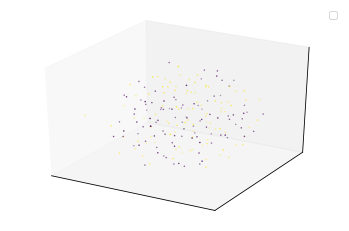

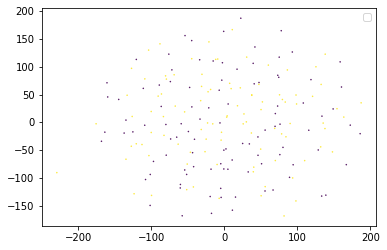

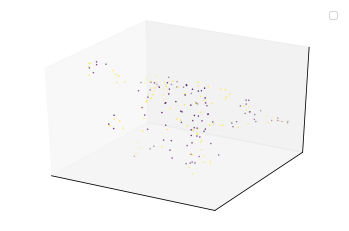

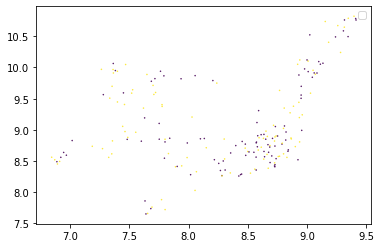

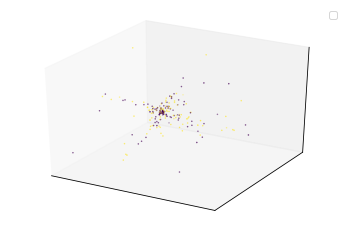

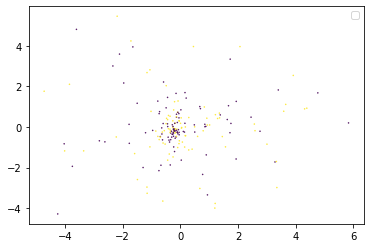

finished


In [31]:
#import umap
print("calculate tsne_umap_pca")
tsne_mat,umap_mat,pca_mat,Y=obj1.calculate_lower_dimensions(obj1.zs,obj1.y_last,N=200)
obj1.plot_lower_dimension(tsne_mat,Y,projection='3d',save_str='tsne3d.pdf')
obj1.plot_lower_dimension(tsne_mat,Y,projection='2d',save_str='tsne2d.pdf')
obj1.plot_lower_dimension(umap_mat,Y,projection='3d',save_str='umap3d.pdf')
obj1.plot_lower_dimension(umap_mat,Y,projection='2d',save_str='umap2d.pdf')
obj1.plot_lower_dimension(pca_mat,Y,projection='3d',save_str='pca3d.pdf')
obj1.plot_lower_dimension(pca_mat,Y,projection='2d',save_str='pca2d.pdf')

print("finished")


In [32]:
print(obj1.y_last)

tensor([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [33]:
ff = obj1.traversal_all_groups(traversal_step=5)
print(ff)

0
273 245
[[ 0.06864756 -0.04257677 -0.1672287  -0.23019264 -0.3179677 ]
 [ 0.05166699  0.06331772 -0.14159915 -0.3052939  -0.4443147 ]
 [ 0.02728761  0.07418615 -0.08642075 -0.30098899 -0.40802172]
 [ 0.08264659  0.06281034 -0.02367765 -0.30971615 -0.39767054]
 [ 0.17404589  0.02869245  0.09197965 -0.08289724 -0.00269703]]
1
246 236
[[-0.09981015  0.24690334  0.07194062 -0.16381814  0.12439736]
 [-0.05664071  0.25225461  0.08376843 -0.33053932  0.23094542]
 [-0.04167825  0.24702749  0.05643038 -0.37641795  0.25948986]
 [ 0.02291531  0.22168329  0.05430756 -0.39457206  0.26571321]
 [ 0.13701999  0.13887334  0.01178145 -0.24777189  0.19943394]]
{'mean': {'0':           A         B         C         D         E
0  0.068648 -0.042577 -0.167229 -0.230193 -0.317968
1  0.051667  0.063318 -0.141599 -0.305294 -0.444315
2  0.027288  0.074186 -0.086421 -0.300989 -0.408022
3  0.082647  0.062810 -0.023678 -0.309716 -0.397671
4  0.174046  0.028692  0.091980 -0.082897 -0.002697, '1':           A    

In [34]:
import pickle
with open('results_dict.pkl', 'rb') as f:
    ff = pickle.load(f)

In [35]:
ff['med']['0']

,A,B,C,D,E
0,0.048217,-0.003597,-0.121888,0.016901,-0.305815
1,0.046409,0.007808,-0.075398,-0.037613,-0.317456
2,0.056028,0.012767,-0.038754,-0.045700,-0.284372
3,0.090392,0.014123,-0.008574,-0.053897,-0.218487
4,0.140671,0.008862,0.055641,0.035504,-0.076664


In [36]:
ff['mean']['1']

,A,B,C,D,E
0,-0.099810,0.246903,0.071941,-0.163818,0.124397
1,-0.056641,0.252255,0.083768,-0.330539,0.230945
2,-0.041678,0.247027,0.056430,-0.376418,0.259490
3,0.022915,0.221683,0.054308,-0.394572,0.265713
4,0.137020,0.138873,0.011781,-0.247772,0.199434


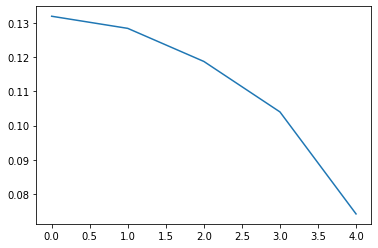

In [37]:
import matplotlib.pyplot as plt
plt.plot(ff['med']['1']['B'])

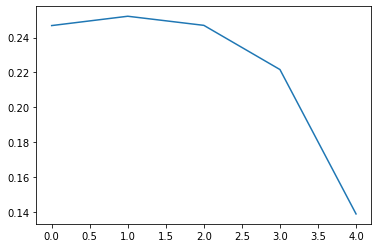

In [38]:
import matplotlib.pyplot as plt
plt.plot(ff['mean']['1']['B'])

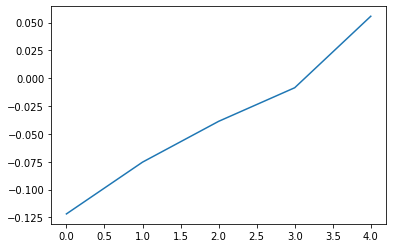

In [39]:
import matplotlib.pyplot as plt
plt.plot(ff['med']['0']['C'])

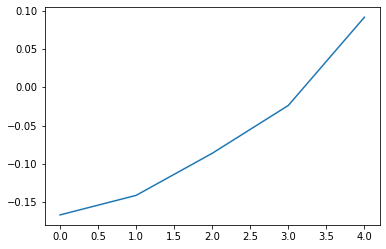

In [40]:
import matplotlib.pyplot as plt
plt.plot(ff['mean']['0']['C'])

In [41]:
bb = obj1.synthetic_single_group(group_id=0,nr_of_synthetic=20000)

518 518


In [42]:
bb

array([[-1.15967488,  0.81984258,  1.37199366,  0.80593854,  0.0533719 ],
       [-1.15679729,  0.81598401,  1.37102294,  0.80558109,  0.05166536],
       [-1.15333951,  0.81209767,  1.37000084,  0.80513632,  0.04995669],
       ...,
       [ 0.71876895, -0.44615817,  0.67737448,  1.03077829,  0.11675476],
       [ 0.71628809, -0.45159769,  0.6656878 ,  1.03171635,  0.12260022],
       [ 0.7137996 , -0.45704025,  0.65385008,  1.03265655,  0.12845293]])

In [43]:
bb.shape

(20000, 5)